# Homework 1: simulation, and probability

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

In [2]:
import numpy as np
rng = np.random.default_rng()

# 1. Probabilities and expectations

Find the following quantities, both by (i) *math* and by (ii) *simulation*,
for the independent random variables
$$\begin{aligned}
N &\sim \text{Poisson}(\text{mean}=2) \\
T &\sim \text{Exponential}(\text{mean}=5) \\
X &\sim \text{Normal}(\text{mean}=10, \text{sd}=3) .
\end{aligned}$$

For instance, if asked to find the probability that $N=0$
then you might [consult Wikipedia](https://en.wikipedia.org/wiki/Poisson_distribution),
and so report that (i) this is
$$\mathbb{P}\{N = 0\} = e^{-\lambda} = e^{-2}$$
and to verify this (ii)

In [3]:
N = rng.poisson(lam=2, size=1000000)
print(f"Simulation: {np.mean(N == 0)}, theory: {np.exp(-2)}")

Simulation: 0.135154, theory: 0.1353352832366127


Note you should include a comparison of the numerical value produced by your mathematical expression,
and reference to any properties of random variables used in the calculations.

**a.** The probability that $T < 4$.

**b.** The standard deviation of $T + X$.

**c.** The expected value of $2X + 1$.

**d.** The expected value of $NT$ (i.e., the product of $N$ and $T$).

In [4]:
# Set up the RNG
rng = np.random.default_rng()
'''1A)'''
# Simulate Exponential(mean=5), so scale=5
T = rng.exponential(scale=5, size=1_000_000)
Asimulatedmean = np.mean(T < 4)
# Theoretical probability
Atheoretical_T = 1 - np.exp(-4 / 5)
print(f"Simulation: {Asimulatedmean}, theory: {Atheoretical_T}")

'''1B)'''
#Simulate standard dev(mean = 10, std = 3)
X = rng.normal(loc=10, scale=3, size=1_000_000)
# Simulate T + X and calculate std
Bsimulated_std = np.std(T + X)
# Theoretical standard deviation
Btheoretical_std = np.sqrt(25 + 9)
print(f"Simulation: {Bsimulated_std}, theory: {Btheoretical_std}")

'''1C)'''
#Simulate expected value(x)
X = rng.normal(loc=10, scale=3, size=1_000_000)
# Simulated expected value
Csimulated_mean = np.mean(2 * X + 1)
# Theoretical expected value
Ctheoretical_mean = 2 * 10 + 1
print(f"Simulation: {Csimulated_mean}, theoretical: {Ctheoretical_mean}")

'''1D)'''
# Simulate N ~ Poisson(2)
N = rng.poisson(lam=2, size=1_000_000)
# Simulate T ~ Exponential(mean=5)
T = rng.exponential(scale=5, size=1_000_000)
# Simulated expected value
Dsimulated_mean = np.mean(N * T)
# Theoretical expected value
Dtheoretical_mean = 2 * 5
print(f"Simulation: {Dsimulated_mean}, theoretical: {Dtheoretical_mean}")



Simulation: 0.549776, theory: 0.5506710358827784
Simulation: 5.8393921581838715, theory: 5.830951894845301
Simulation: 21.001147346152063, theoretical: 21
Simulation: 10.007919320720243, theoretical: 10


## 2. Ascending sums

For each $i \ge 1$, Let $D_i$ be a random number drawn
independently and uniformly from $\{1, 2, 3, 4, 5, 6\}$.
Let $$ K = \min\{ k \ge 1 \;:\; D_k + D_{k+1} = 7 \} , $$
i.e., $K$ is defined by the fact that
$D_{K}$ and $D_{K+1}$ are the first pair of adjacent rolled numbers
that add up to 7.
Finally, let
$$ X = \sum_{i=1}^K D_i . $$

**a.** Describe in words how to simulate $X$ using fair dice.

**b.** Write a function to simulate $X$ (in python).
    The function should have one argument, `size`,
    that determines the number of independent samples of $X$ that are returned.

**c.** Make a plot describing the distribution of $X$, and estimate its mean (by simulating at least $10^5$ values).

#2
##a. To simulate X, 
1. Roll dice one at a time(in order to simulate them independently)

2. Store each value as an integer

3. After each roll (starting from second), check if the sum of the current and previous roll equals 7.

4. Stop as soon as you find such a pair.

5. Add up all the dice rolled up to and including the first die of that pair — this sum is your value of X.

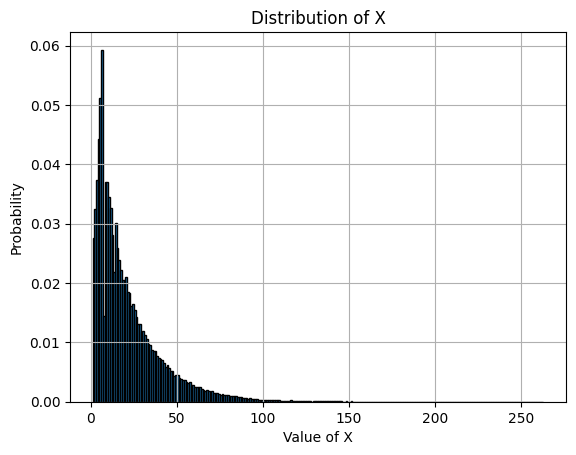

Estimated mean of X: 21.149


In [1]:

##b
import numpy as np
import matplotlib.pyplot as plt
'''B'''
#simulate X for some int size
def simulate_X(size=1):
    results = []
    #each session independently size times
    for _ in range(size):
        rolls = []
        #this ensures the dice rolls are independent
        while True:
            roll = np.random.randint(1, 7)  # Roll from 1 to 6
            rolls.append(roll)
            if len(rolls) >= 2 and rolls[-1] + rolls[-2] == 7:
                break
        X = sum(rolls[:-1])  # sum up to and including D_K (i.e., rolls[:-1])
        results.append(X)

    return np.array(results)
'''B'''
# Simulate many values of X
samples = simulate_X(size=10**5)

# Plot the distribution
plt.hist(samples, bins=range(min(samples), max(samples)+1), edgecolor='black', density=True)
plt.title("Distribution of X")
plt.xlabel("Value of X")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

# Estimate the mean
mean_X = np.mean(samples)
print(f"Estimated mean of X: {mean_X:.3f}")
